# Rentals and Public Housing, 2011 and 2016

### Import libraries, Import data, Get a clean dataframe

In [1]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import numpy as np
from datetime import datetime
from datetime import date
import statsmodels.api as sm
import geopandas as gpd
from geopandas import GeoDataFrame
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#read in B32 Table (2011): Tenure Type and Landlord Type by Dwelling Structure
b32 = pd.read_csv('C:\\Users\\ryanm\\Box\\Shared 228 Sydney Folder\\AU Work\\2011_census_files\\SA2_NSW\\2011Census_B32_NSW_SA2_short.csv')

#read in G33 Table (2016): enure Type and Landlord Type by Dwelling Structure
g33 = pd.read_csv('C:\\Users\\ryanm\\Box\\Shared 228 Sydney Folder\\AU Work\\2016_census_files\\SA2_NSW\\2016Census_G33_NSW_SA2.csv')

#read in the correspondence file 2011<->2016
corr = pd.read_csv('C:\\Users\\ryanm\\Box\\Shared 228 Sydney Folder\\AU Work\\2011_2016_correspondence\\2011_2016_corr.csv')

### Cleaning Table B32 (2011)

In [3]:
# print(list(b32.columns))

In [4]:
#restrict data frame to needed variables

b32 = b32[['region_id', 'R_ST_h_auth_Total', 'R_Tot_Total', 'Ten_type_NS_Total', 'Total_Total']]

In [5]:
#rename variables

b32.rename(columns={'region_id':'SA2_MAINCODE_2011',
                    'R_ST_h_auth_Total':'ten_rent_public_11', 
                    'R_Tot_Total':'ten_rent_all_11',
                    'Ten_type_NS_Total':'ten_typeNS_11',
                    'Total_Total':'ten_total_11'}, inplace=True)

In [6]:
#calculate a value for dwellings with tenure stated

b32['ten_typeS_11'] = b32['ten_total_11'] - b32['ten_typeNS_11']

In [7]:
#merge many:many, joining B32 table (NSW) to the correspondence table (all of Australia)

tenure_2011 = pd.merge(b32,corr,on='SA2_MAINCODE_2011',how='right')

In [8]:
#apply correspondence ratio

tenure_2011['ten_rent_public_11_sa2'] = tenure_2011['ten_rent_public_11'] * tenure_2011['RATIO']
tenure_2011['ten_rent_all_11_sa2'] = tenure_2011['ten_rent_all_11'] * tenure_2011['RATIO']
tenure_2011['ten_typeNS_11_sa2'] = tenure_2011['ten_typeNS_11'] * tenure_2011['RATIO']
tenure_2011['ten_typeS_11_sa2'] = tenure_2011['ten_typeS_11'] * tenure_2011['RATIO']
tenure_2011['ten_total_11_sa2'] = tenure_2011['ten_total_11'] * tenure_2011['RATIO']

In [9]:
#pull csv and pivot in Excel

tenure_2011.to_csv('C:\\Users\\ryanm\\Box\\Shared 228 Sydney Folder\\AU Work\\Indv Work Folder\\Ryan Work Folder\\tenure_2011.csv',index=False)

In [10]:
#read back in pivoted data

tenure_2011_sa2 = pd.read_csv('C:\\Users\\ryanm\\Box\\Shared 228 Sydney Folder\\AU Work\\Indv Work Folder\\Ryan Work Folder\\tenure_2011_sa2.csv')

### Clean Table G33 (2016)

In [11]:
# print(list(g33.columns))

In [12]:
#restrict data frame to needed variables

g33 = g33[['SA2_MAINCODE_2016', 'R_ST_h_auth_Total', 'R_Tot_Total', 'Ten_type_NS_Total', 'Total_Total']]

In [13]:
#rename variables

g33.rename(columns={'R_ST_h_auth_Total':'ten_rent_public_16', 
                    'R_Tot_Total':'ten_rent_all_16',
                    'Ten_type_NS_Total':'ten_typeNS_16',
                    'Total_Total':'ten_total_16'}, inplace=True)

In [14]:
#calculate a value for dwellings with tenure stated

g33['ten_typeS_16'] = g33['ten_total_16'] - g33['ten_typeNS_16']

### Merge 2011 and 2016 Tables

In [15]:
#merge 2011 and 2016 tables
tenure = pd.merge(tenure_2011_sa2,g33,on='SA2_MAINCODE_2016',how="right")
tenure

,SA2_MAINCODE_2016,ten_rent_public_11_sa2,ten_rent_all_11_sa2,ten_typeNS_11_sa2,ten_typeS_11_sa2,ten_total_11_sa2,ten_rent_public_16,ten_rent_all_16,ten_typeNS_16,ten_total_16,ten_typeS_16
0,101021007,9.000000,254.000000,27.000000,1278.000000,1305.000000,9,259,53,1453,1400
1,101021008,332.000000,928.000000,89.000000,3000.000000,3089.000000,296,883,78,2963,2885
2,101021009,163.000000,1689.000000,136.000000,4225.000000,4361.000000,152,2088,145,4621,4476
3,101021010,63.000000,851.000000,34.000000,1958.000000,1992.000000,61,921,60,2030,1970
4,101021011,3.000000,524.000000,63.000000,4434.000000,4497.000000,0,601,99,5243,5144
...,...,...,...,...,...,...,...,...,...,...,...
573,128021607,37.245148,606.735482,65.479374,5409.557441,5475.036815,42,738,107,5645,5538
574,128021608,16.109758,262.433148,28.321993,2339.812374,2368.134367,7,186,31,2365,2334
575,128021609,8.645094,140.831370,15.198633,1255.630185,1270.828818,0,52,18,1087,1069
576,197979799,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0


### Merge SA2 Shapes for UCL Area

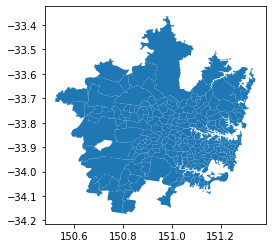

In [16]:
syd_ucl = gpd.read_file('C:\\Users\\ryanm\\Box\\Shared 228 Sydney Folder\\SA2 Shapefiles\\sa2_ucl.dbf')
syd_ucl['SA2_MAIN16']=syd_ucl['SA2_MAIN16'].astype(int)
syd_ucl.plot()

In [17]:
#merge 2011 and 2016 data with UCL SA2 data
tenure = pd.merge(syd_ucl, tenure, left_on='SA2_MAIN16', right_on='SA2_MAINCODE_2016', how='left').copy()
tenure

,SA2_MAIN16,SA2_5DIG16,SA2_NAME16,SA3_CODE16,SA3_NAME16,SA4_CODE16,SA4_NAME16,GCC_CODE16,GCC_NAME16,STE_CODE16,STE_NAME16,AREASQKM16,geometry,SA2_MAINCODE_2016,ten_rent_public_11_sa2,ten_rent_all_11_sa2,ten_typeNS_11_sa2,ten_typeS_11_sa2,ten_total_11_sa2,ten_rent_public_16,ten_rent_all_16,ten_typeNS_16,ten_total_16,ten_typeS_16
0,115011290,11290,Baulkham Hills (East),11501,Baulkham Hills,115,Sydney - Baulkham Hills and Hawkesbury,1GSYD,Greater Sydney,1,New South Wales,8.3081,"POLYGON ((150.97069 -33.75928, 150.97071 -33.7...",115011290,50.000000,1355.000000,116.000000,7242.000000,7358.000000,53,1655,140,7657,7517
1,115011291,11291,Baulkham Hills (West) - Bella Vista,11501,Baulkham Hills,115,Sydney - Baulkham Hills and Hawkesbury,1GSYD,Greater Sydney,1,New South Wales,10.9631,"POLYGON ((150.94715 -33.74089, 150.94704 -33.7...",115011291,24.000000,596.000000,55.000000,5518.000000,5573.000000,21,878,69,5971,5902
2,115011294,11294,Glenhaven,11501,Baulkham Hills,115,Sydney - Baulkham Hills and Hawkesbury,1GSYD,Greater Sydney,1,New South Wales,7.2309,"POLYGON ((150.98461 -33.70294, 150.98468 -33.7...",115011294,0.000000,153.999969,26.999995,1817.999636,1844.999631,0,125,44,2049,2005
3,115011296,11296,West Pennant Hills,11501,Baulkham Hills,115,Sydney - Baulkham Hills and Hawkesbury,1GSYD,Greater Sydney,1,New South Wales,7.8291,"POLYGON ((151.02214 -33.73881, 151.02214 -33.7...",115011296,0.000000,402.000000,38.000000,3765.000000,3803.000000,0,379,57,3825,3768
4,115011553,11553,Castle Hill - Central,11501,Baulkham Hills,115,Sydney - Baulkham Hills and Hawkesbury,1GSYD,Greater Sydney,1,New South Wales,4.1512,"POLYGON ((150.97343 -33.73437, 150.97332 -33.7...",115011553,13.134150,437.629878,42.029280,2362.833585,2404.862865,0,746,55,2586,2531
5,115011554,11554,Castle Hill - East,11501,Baulkham Hills,115,Sydney - Baulkham Hills and Hawkesbury,1GSYD,Greater Sydney,1,New South Wales,2.0720,"POLYGON ((151.02112 -33.71443, 151.02148 -33.7...",115011554,2.976880,192.810254,27.020914,1649.420732,1676.441647,0,259,56,1833,1777
6,115011555,11555,Castle Hill - North,11501,Baulkham Hills,115,Sydney - Baulkham Hills and Hawkesbury,1GSYD,Greater Sydney,1,New South Wales,6.8149,"POLYGON ((150.98369 -33.70475, 150.98364 -33.7...",115011555,20.701770,689.782976,66.245664,3724.248423,3790.494087,33,610,71,3751,3680
7,115011556,11556,Castle Hill - South,11501,Baulkham Hills,115,Sydney - Baulkham Hills and Hawkesbury,1GSYD,Greater Sydney,1,New South Wales,4.1277,"POLYGON ((151.00308 -33.73490, 151.00317 -33.7...",115011556,16.164080,538.587146,51.725056,2907.917992,2959.643048,0,672,56,3040,2984
8,115011557,11557,Castle Hill - West,11501,Baulkham Hills,115,Sydney - Baulkham Hills and Hawkesbury,1GSYD,Greater Sydney,1,New South Wales,1.6363,"POLYGON ((150.96740 -33.71677, 150.96705 -33.7...",115011557,3.248550,199.460970,14.293620,1459.898370,1474.191990,0,218,14,1504,1490
9,115011558,11558,Cherrybrook,11501,Baulkham Hills,115,Sydney - Baulkham Hills and Hawkesbury,1GSYD,Greater Sydney,1,New South Wales,8.2514,"POLYGON ((151.03389 -33.71908, 151.03393 -33.7...",115011558,10.023120,649.189746,90.979086,5553.579268,5644.558353,7,816,82,5797,5715


### Find Cells with Small Population to Exclude

In [18]:
tenure['ten_rent_all_11_sa2'].describe(percentiles=[.038,.05,.1,.2,.4,.6,.8])

count     265.000000
mean     1668.695771
std      1175.671600
min         0.000000
3.8%      141.252765
5%        189.762051
10%       363.303634
20%       688.226381
40%      1185.889892
50%      1480.827702
60%      1716.200000
80%      2480.000000
max      5750.000000
Name: ten_rent_all_11_sa2, dtype: float64

In [19]:
# of 265 total, 10 SA2s (3.8%) have <100 occupied rental dwellings in 2011
# we should exclude these SA2s

tenure.loc[tenure['ten_rent_all_11_sa2']<100]

,SA2_MAIN16,SA2_5DIG16,SA2_NAME16,SA3_CODE16,SA3_NAME16,SA4_CODE16,SA4_NAME16,GCC_CODE16,GCC_NAME16,STE_CODE16,STE_NAME16,AREASQKM16,geometry,SA2_MAINCODE_2016,ten_rent_public_11_sa2,ten_rent_all_11_sa2,ten_typeNS_11_sa2,ten_typeS_11_sa2,ten_total_11_sa2,ten_rent_public_16,ten_rent_all_16,ten_typeNS_16,ten_total_16,ten_typeS_16
31,116031318,11318,Prospect Reservoir,11603,Mount Druitt,116,Sydney - Blacktown,1GSYD,Greater Sydney,1,New South Wales,30.6917,"POLYGON ((150.87171 -33.78717, 150.87185 -33.7...",116031318,0.0,0.0,0.0,0.0,0.0,0,3,0,5,5
33,117011320,11320,Banksmeadow,11701,Botany,117,Sydney - City and Inner South,1GSYD,Greater Sydney,1,New South Wales,3.3683,"POLYGON ((151.20806 -33.95406, 151.20816 -33.9...",117011320,0.0,3.0,0.0,3.0,3.0,0,0,0,4,4
37,117011324,11324,Port Botany Industrial,11701,Botany,117,Sydney - City and Inner South,1GSYD,Greater Sydney,1,New South Wales,2.8044,"POLYGON ((151.22090 -33.96897, 151.22066 -33.9...",117011324,0.0,0.0,0.0,0.0,0.0,0,0,0,4,4
38,117011325,11325,Sydney Airport,11701,Botany,117,Sydney - City and Inner South,1GSYD,Greater Sydney,1,New South Wales,8.9106,"POLYGON ((151.16260 -33.93277, 151.16269 -33.9...",117011325,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
55,118011342,11342,Centennial Park,11801,Eastern Suburbs - North,118,Sydney - Eastern Suburbs,1GSYD,Greater Sydney,1,New South Wales,1.9786,"POLYGON ((151.22705 -33.89857, 151.22709 -33.8...",118011342,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
71,119011355,11355,Chullora,11901,Bankstown,119,Sydney - Inner South West,1GSYD,Greater Sydney,1,New South Wales,4.0501,"POLYGON ((151.02884 -33.88798, 151.02987 -33.8...",119011355,0.0,0.0,0.0,0.0,0.0,3,75,5,249,244
184,125011475,11475,Rookwood Cemetery,12501,Auburn,125,Sydney - Parramatta,1GSYD,Greater Sydney,1,New South Wales,3.0150,"POLYGON ((151.05662 -33.86477, 151.05662 -33.8...",125011475,0.0,6.0,0.0,6.0,6.0,0,0,0,0,0
201,125031486,11486,Smithfield Industrial,12503,Merrylands - Guildford,125,Sydney - Parramatta,1GSYD,Greater Sydney,1,New South Wales,4.3017,"POLYGON ((150.92540 -33.83703, 150.92504 -33.8...",125031486,0.0,3.0,0.0,3.0,3.0,0,3,0,3,3
202,125031487,11487,Yennora Industrial,12503,Merrylands - Guildford,125,Sydney - Parramatta,1GSYD,Greater Sydney,1,New South Wales,2.0787,"POLYGON ((150.95492 -33.85534, 150.95512 -33.8...",125031487,0.0,6.0,0.0,6.0,6.0,0,3,0,3,3
241,127021521,11521,Wetherill Park Industrial,12702,Fairfield,127,Sydney - South West,1GSYD,Greater Sydney,1,New South Wales,8.5566,"POLYGON ((150.87999 -33.84014, 150.88005 -33.8...",127021521,0.0,3.0,0.0,3.0,3.0,0,5,0,6,6


Text(0.5, 1, 'Areas with Less than 100 Occupied Rental Dwellings, 2011')

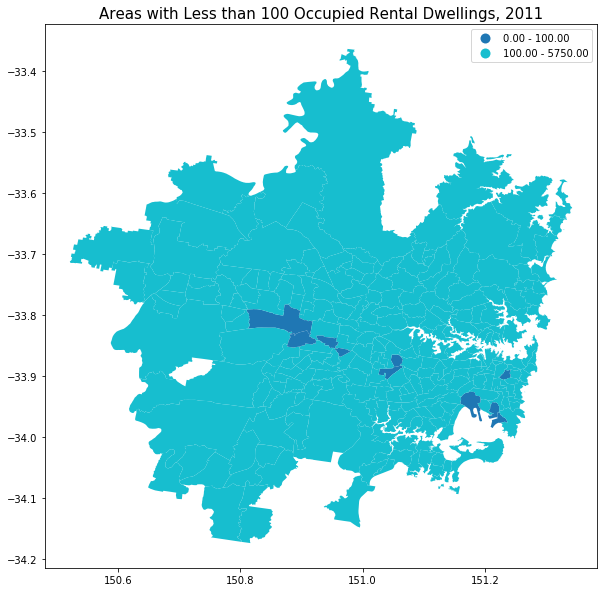

In [20]:
figure, ax = plt.subplots(figsize=(12,10))
base = tenure.plot(column='ten_rent_all_11_sa2', scheme='user_defined', classification_kwds={'bins':[100]}, legend=True, ax=ax, cmap="tab10")
ax.set_title("Areas with Less than 100 Occupied Rental Dwellings, 2011", fontdict={'fontsize':15})

In [21]:
#calculate a variable for SA2s with minimum 100 occupied rental dwellings in 2011

tenure['ten_rent_min100_11'] = np.where(tenure['ten_rent_all_11_sa2'] < 100, 0, 1)

### Calculate Percent of Occupied Dwellings that are Rentals

In [22]:
#calculate % of occupied dwellings that are rentals
tenure['ten_rent_pct_11'] = (tenure['ten_rent_all_11_sa2'])/(tenure['ten_typeS_11_sa2'])
tenure['ten_rent_pct_16'] = (tenure['ten_rent_all_16'])/(tenure['ten_typeS_16'])

In [23]:
tenure['ten_rent_pct_11'].describe(percentiles=[.2,.4,.6,.8])

count    260.000000
mean       0.328031
std        0.164320
min        0.067057
20%        0.185199
40%        0.266523
50%        0.309999
60%        0.353209
80%        0.441808
max        1.000000
Name: ten_rent_pct_11, dtype: float64

In [24]:
tenure['rentals_ovregmed_11'] = np.where(tenure['ten_rent_pct_11'] > 0.309999, 1, 0)

In [25]:
tenure['ten_rent_pct_16'].describe(percentiles=[.2,.4,.6,.8])

count    262.000000
mean       0.343591
std        0.167375
min        0.000000
20%        0.183065
40%        0.288782
50%        0.334239
60%        0.375034
80%        0.487684
max        1.000000
Name: ten_rent_pct_16, dtype: float64

In [26]:
tenure['rentals_ovregmed_16'] = np.where(tenure['ten_rent_pct_16'] > 0.334239, 1, 0)

### Export to CSV

In [27]:
tenure['rentals_ov100_11'] = tenure['ten_rent_min100_11']
tenure['rentals_pct_11'] = tenure['ten_rent_pct_11']
tenure['rentals_pct_16'] = tenure['ten_rent_pct_16']

In [28]:
output_csv = tenure[['SA2_MAINCODE_2016','rentals_ov100_11','rentals_pct_11','rentals_pct_16','rentals_ovregmed_11','rentals_ovregmed_16']]
output_csv.to_csv('rentals.csv')

### Identify Areas with a Large Number of Public Housing Dwellings

In [ ]:
tenure['ten_rent_public_11_sa2'].describe(percentiles=[.2,.4,.6,.8])

In [ ]:
#calculate % of occupied rental dwellings that are public housing
tenure['rent_public_pct_11'] = (tenure['ten_rent_public_11_sa2'])/(tenure['ten_rent_all_11_sa2'])
tenure['rent_public_pct_16'] = (tenure['ten_rent_public_16'])/(tenure['ten_rent_all_16'])

# calc % of all dwellings that are public rentals
tenure['ten_public_pct_11'] = (tenure['ten_rent_public_11_sa2'])/(tenure['ten_typeS_11_sa2'])
tenure['ten_public_pct_16'] = (tenure['ten_rent_public_16'])/(tenure['ten_typeS_16'])

In [ ]:
tenure['rent_public_pct_11'].describe(percentiles=[.2,.4,.6,.8])

In [ ]:
tenure['ten_public_pct_11'].describe(percentiles=[.2,.4,.6,.8])

In [ ]:
tenure['public_chg_11_16'] = tenure['ten_rent_public_16'] - tenure['ten_rent_public_11_sa2']

In [ ]:
tenure['public_chg_11_16'].describe(percentiles=[.2,.4,.6,.8,.9])

In [ ]:
figure, ax = plt.subplots(figsize=(12,10))
base = tenure.plot(column='public_chg_11_16', scheme='user_defined', classification_kwds={'bins':[-50,-25,0,25,50]}, legend=True, ax=ax, cmap="Spectral")
ax.set_title("Public Housing Dwellings, 2016", fontdict={'fontsize':15})

In [ ]:
figure, ax = plt.subplots(figsize=(12,10))
base = tenure.plot(column='ten_rent_public_11_sa2', scheme='fisher_jenks', k=5, legend=True, ax=ax, cmap="YlOrRd")
ax.set_title("Public Housing Dwellings, 2011", fontdict={'fontsize':15})

In [ ]:
figure, ax = plt.subplots(figsize=(12,10))
base = tenure.plot(column='ten_rent_public_11_sa2', scheme='user_defined', classification_kwds={'bins':[123]}, legend=True, ax=ax, cmap="coolwarm")
ax.set_title("Public Housing Dwellings, 2011", fontdict={'fontsize':15})

In [ ]:
figure, ax = plt.subplots(figsize=(12,10))
base = tenure.plot(column='ten_rent_public_16', scheme='fisher_jenks', k=5, legend=True, ax=ax, cmap="YlOrRd")
ax.set_title("Public Housing Dwellings, 2016", fontdict={'fontsize':15})

In [ ]:
ten_map = tenure

In [ ]:
ten_map['ten_rent_pct_11'].replace(to_replace=np.nan, value=0, inplace=True)
ten_map['rent_public_pct_11'].replace(to_replace=np.nan, value=0, inplace=True)
ten_map['ten_public_pct_11'].replace(to_replace=np.nan, value=0, inplace=True)




In [ ]:
figure, ax = plt.subplots(figsize=(12,10))
base = ten_map.plot(column='ten_rent_pct_11', scheme='fisher_jenks', k=5, legend=True, ax=ax, cmap="YlOrRd")
ax.set_title("Percent of Occupied Dwellings that are Rentals, 2011", fontdict={'fontsize':15})

In [ ]:
figure, ax = plt.subplots(figsize=(12,10))
base = ten_map.plot(column='ten_rent_pct_11', scheme='user_defined', classification_kwds={'bins':[.027]}, legend=True, ax=ax, cmap="coolwarm")
ax.set_title("Percent of Occupied Dwellings that are Rentals, 2011", fontdict={'fontsize':15})

In [ ]:
figure, ax = plt.subplots(figsize=(12,10))
base = ten_map.plot(column='rent_public_pct_11', scheme='fisher_jenks', k=2, legend=True, ax=ax, cmap="YlOrRd")
ax.set_title("Percent of Occupied Rental Dwellings that are Public Housing, 2011", fontdict={'fontsize':15})

In [ ]:
figure, ax = plt.subplots(figsize=(12,10))
base = ten_map.plot(column='ten_public_pct_11', scheme='user_defined', classification_kwds={'bins':[.027]}, legend=True, ax=ax, cmap="YlOrRd")
ax.set_title("Percent of Occupied Dwellings that are Public Rentals, 2011", fontdict={'fontsize':15})

In [ ]:
ten_map['ten_public_pct_11'].plot.hist()

In [ ]:
figure, ax = plt.subplots(figsize=(12,10))
base = tenure.plot(column='ten_rent_public_11_sa2', scheme='user_defined', classification_kwds={'bins':[123]}, legend=True, ax=ax, cmap="coolwarm")
ax.set_title("Public Housing Dwellings, 2011", fontdict={'fontsize':15})